# Data Wrangling - Magic Bricks Data

This notebook details the steps I've taken to handle, wrangle, transform into a format usable for supplying as input to a learning model. 

After the data was collected from magicbricks.com, it was saved into a file. I've edited this file from the source to make sure that the column names didn't have any commas as we had saved it in a csv format and would cause trouble when it is loaded into a dataframe. 

First step is to list out the columns available and consider the ones that are important to us. 

In [1]:
import pandas as pd

df_loaded = pd.read_csv('URLsDataMaster_2_Edited.csv')
df_loaded.columns

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,5,6,23,25,27,31,38,51,53,59,62,69,74,75,96,98,99,100,103,104,110,111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Balconies', 'Balcony', 'Bathroom',
       'Bathrooms', 'Bedroom', 'Bedrooms', 'Car parking', 'Carpet area',
       ...
       'Type of Ownership', 'Water Availability', 'golden"', 'v6', '"',
       'park,school', 's', 'Availability', 'Project Name',
       'Status of Electricity'],
      dtype='object', length=113)

Among these columns, the ones that I considered are of importance are following:
   1. Bedrooms - 'data-bedroomd' column
   2. Bathrooms - 'data-bathrooms' column
   3. Car parking availability
   4. Super area - Area of the house. (Carpet area is not available for all properties. So we will use carpet area)
   5. Property type - 'data-propertytype' column
   6. Transaction Type - 'Transaction Type' column
   7. Locality Rating - Locality rating is retrieved from other file which was created by querying locality ids only
   
Price(data-price column) will be the prediction output. 

Initial filtering steps:

1. The record should have a title. It can't be null or empty.'
2. Mandatory parameters are bathrooms, bedrooms, property type. 

Drop the unnecessary columns from the Dataframe and examine the records.

In [3]:
df_loaded.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df_loaded.head(5)

,Balconies,Balcony,Bathroom,Bathrooms,Bedroom,Bedrooms,Car parking,Carpet area,Floor,Furnished status,...,Type of Ownership,Water Availability,"golden""",v6,"""","park,school",s,Availability,Project Name,Status of Electricity
0,NaN,NaN,NaN,2,NaN,3See DimensionBedroom 113.06 X 11.04 ft,NaN,952sqftsqftsqyrdsqmacrebighahectaremarlakanalb...,13 (Out of 13 Floors),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,3,NaN,3See DimensionsBedroom 111 X 12.9 ftBedroom 2 ...,1 Covered,NaN,6 (Out of 18 Floors),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,5,NaN,5,None,NaN,NaN,Unfurnished,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3,NaN,3,None,NaN,NaN,Unfurnished,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2,NaN,2,1 Covered,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_loaded.dropna(subset=['data-title', 'data-bathrooms','data-bedroomd','data-propertytype', 'Transaction type'], inplace=True)

Examine the dataset again.

In [13]:
print(len(df_loaded))
df_loaded.head(5)

26357


,Balconies,Balcony,Bathroom,Bathrooms,Bedroom,Bedrooms,Car parking,Carpet area,Floor,Furnished status,...,"golden""",v6,"""","park,school",s,Availability,Project Name,Status of Electricity,superArea,carP1
0,NaN,NaN,NaN,2,NaN,3See DimensionBedroom 113.06 X 11.04 ft,NaN,952sqftsqftsqyrdsqmacrebighahectaremarlakanalb...,13 (Out of 13 Floors),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435,1
1,NaN,NaN,NaN,3,NaN,3See DimensionsBedroom 111 X 12.9 ftBedroom 2 ...,1 Covered,NaN,6 (Out of 18 Floors),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1814,1
2,NaN,NaN,NaN,5,NaN,5,None,NaN,NaN,Unfurnished,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3842,0
3,NaN,NaN,NaN,3,NaN,3,None,NaN,NaN,Unfurnished,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1538,0
4,NaN,NaN,NaN,2,NaN,2,1 Covered,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1405,1


Let's examine the column of 'Super area'. 

In [6]:
df_loaded['Super area'].head(5)

0    1435sqftsqftsqyrdsqmacrebighahectaremarlakanal...
1    1814sqftsqftsqyrdsqmacrebighahectaremarlakanal...
2    3842sqftsqftsqyrdsqmacrebighahectaremarlakanal...
3    1538sqftsqftsqyrdsqmacrebighahectaremarlakanal...
4    1405sqftsqftsqyrdsqmacrebighahectaremarlakanal...
Name: Super area, dtype: object

We see that it is of string type with lot of text in each record. What we want is just the first 3-6 digits which show the exact area. Below function, which uses the regular expression, will help extract the area.

In [9]:
import re
def extract_area(st):
    st = str(st)
    st = st.replace(',','')
    ars = re.findall(r'\d{3,6}',st)
    if len(ars) > 0:
        return int(ars[0])
    else:        
        return 0

df_loaded['superArea'] = [extract_area(st) for st in df_loaded['Super area']]

Next up is Car parking. We are taking it as a boolean where just the availability of the car parking is considered. Below, we will create a new column 'carP1' which has this transformation of car parking. Before that, we will replace the consider the ones without values (default value) as None meaning no parking available. The other parameter which has to be filled with default values for NaNs is the data-bathrooms(This is because there can't be a property without at least on of these). 

In [20]:
df_loaded.fillna(value={'data-bathrooms':1,'Car parking':'None'},inplace=True)

def carParks(x):
    if x == 'None':
        return 0 
    else: 
        return 1
    
df_loaded['carP1'] = [carParks(x) for x in df_loaded['Car parking']]

Now let's see the 'Transaction type' column. 

In [14]:
df_loaded['Transaction type'].unique()

array(['New Property', 'Resale', 'Rent'], dtype=object)

We only want to predict the prices of the properties being sold. So, we will drop the 'Rent's

In [16]:
df_loaded = df_loaded[(df_loaded['Transaction type'] != 'Rent')]

In [28]:
df_loaded['data-possessionstatus'].unique()

array(['Under Construction', 'Ready to Move', nan], dtype=object)

In [29]:
df_loaded['data-localityid'].unique()

array([ 79613.,  80361.,  89025.,  89358.,  80326.,  81971., 102497.,
        87713.,  95570.,  80059., 107299.,  84226.,  87738.,  88527.,
        89374.,  89668.,  80058., 102724.,  89912., 105564.,  79525.,
        79594.,  82097.,  80298.,  79482.,  79507.,  79562., 107969.,
       102621.,  79489.,  86579.,  79498.,  85612.,  81960., 103081.,
        84172., 102223., 102593.,  80349.,  79524., 103046.,  95415.,
       102389.,  80398.,  84752.,  79566.,  90364.,  80353.,  80474.,
        79483., 102767.,  79522.,  89882., 102393.,  95476.,  84119.,
       102412., 102656.,  79561.,  90265.,  80316.,  79603., 102718.,
        95584., 102057.,  80367.,  90528.,  86589.,  79509.,  87357.,
        80071.,  80057., 102633.,  79587.,  84491.,     nan,  79517.,
        81051.,  82095.,  81965., 102302., 103129.,  79504., 102589.,
       102906., 102175., 103611.,  85619., 102819.,  85244.,  79487.,
       102995., 102231.,  87647., 102350., 106541.,  86573., 102450.,
       102076.,  795

Next, we see that there are NaN values in data-localityid and data-possessionstatus columns. As there can't be properties without any locality and possession status, we will filter out these records as well

In [30]:
df_loaded.dropna(subset=['data-localityid','data-possessionstatus'],inplace=True)

Now let's look at the bedroom and bathrooms columns. These columns should be numeric. 

In [31]:
df_loaded['data-bathrooms'].unique()

array([2.0, 3.0, 5.0, 1.0, 4.0, '5.0', '3.0', '2.0', '1.0', '4.0', '2',
       '3', '4', '5', '1', '> 10', '6', '10', '9', '8', '7'], dtype=object)

In [32]:
df_loaded['data-bedroomd'].unique()

array([3, 5, 2, 1, 4, '5', '3', '2', '1', '4', '10-plus', '10', '6', '9',
       '7', '8'], dtype=object)

We see that there are some string objects. '10-plus' and '> 10'. Let's replace these with 11 and also convert these columns to numeric.

In [33]:
df_loaded['data-bedroomd'].replace('10-plus','11',inplace=True)
df_loaded['data-bathrooms'].replace('> 10','11',inplace=True)
df_loaded['data-bathrooms'] = pd.to_numeric(df_loaded['data-bathrooms'])
df_loaded['data-bedroomd'] = pd.to_numeric(df_loaded['data-bedroomd'])

Now let's look at the numeric data. First the superArea

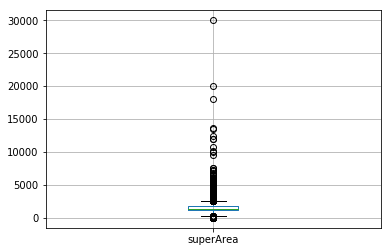

In [39]:
df_loaded.boxplot('superArea')

We see that there are outliers here with values much greater than 5000. So, we can have a filter to consider the records with area < 5500 and at least 500. (Having a minimum makes sense)

In [40]:
df_loaded = df_loaded[(df_loaded.superArea < 5500) & (df_loaded.superArea > 500)]

Next up is the property price.

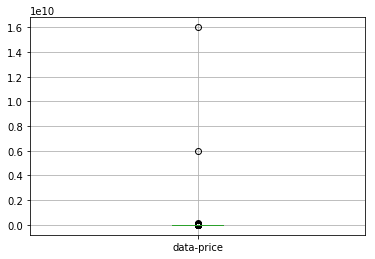

In [41]:
df_loaded.boxplot('data-price')

In [49]:
df_loaded['data-price'].sort_values(ascending=True).iloc[100:120]

21021    2100000.0
22217    2100000.0
17853    2100000.0
21390    2150000.0
25106    2160000.0
24902    2200000.0
16987    2200000.0
25345    2200000.0
24717    2200000.0
17061    2200000.0
22684    2200000.0
24516    2200000.0
25244    2200000.0
17486    2200000.0
20542    2200000.0
15651    2200000.0
24631    2200000.0
15629    2200000.0
17307    2240000.0
24337    2300000.0
Name: data-price, dtype: float64

In [50]:
df_loaded['data-price'].sort_values(ascending=False).head(20)

25507    1.600000e+10
25468    6.000000e+09
19730    1.200000e+08
25521    8.000000e+07
15392    7.700000e+07
16847    7.700000e+07
25470    7.200000e+07
24781    6.700000e+07
25477    6.500000e+07
16269    6.500000e+07
16844    6.300000e+07
16664    6.250000e+07
15820    6.000000e+07
17404    5.900020e+07
24501    5.830000e+07
4977     5.770000e+07
12117    5.770000e+07
14847    5.770000e+07
8727     5.770000e+07
2187     5.770000e+07
Name: data-price, dtype: float64

We see there are many outliers here as well. With price going upwards of 5cr. So, we can have a filter to consider records having price with a minimum of 20lac and a max of 5cr

In [53]:
df_loaded = df_loaded[(df_loaded['data-price'] < 50000000) & (df_loaded['data-price'] > 2000000)]

Let's load the dataframe containing the locality Ids and ratings of the specific localities.

In [55]:
df_locdata = pd.read_csv('locs_data1.csv')

In [57]:
df_locdata.describe()

,Unnamed: 0,Hospital,Market,Restaurants,Schools,rating,locId
count,932.000000,826.000000,826.000000,825.000000,826.000000,845.000000,932.000000
mean,465.500000,4.333083,4.391053,4.180128,4.498876,4.414438,94652.168455
std,269.189524,0.503628,0.464329,0.579172,0.423197,0.352351,18602.317130
min,0.000000,1.000000,2.000000,1.000000,1.000000,2.500000,55893.000000
25%,232.750000,4.000000,4.153846,3.857143,4.333334,4.200000,82005.000000
50%,465.500000,4.428571,4.500000,4.235294,4.555555,4.500000,102021.500000
75%,698.250000,4.666666,4.671474,4.600000,4.750000,4.600000,102671.500000
max,931.000000,5.000000,5.000000,5.000000,5.000000,5.000000,560085.000000


In [58]:
df_locdata.drop('Unnamed: 0', axis=1, inplace=True)

Let's join this with our main data frame so that we can get all the columns required in one place. df_loaded dataframe has the locality id as data-localityid and in the loaded dataframe, we see that the column is locId. 

In [59]:
df_loaded = df_loaded.join(df_locdata.set_index('locId'),on='data-localityid')

Now let's look at the columns that we consider as important. 

In [62]:
df_new = df_loaded[['data-bathrooms', 'data-bedroomd','data-propertytype', 'Transaction type', 'carP1', 'superArea', 'data-localityid',
                    'rating', 'data-price']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24630 entries, 0 to 29370
Data columns (total 9 columns):
data-bathrooms       24630 non-null float64
data-bedroomd        24630 non-null int64
data-propertytype    24630 non-null object
Transaction type     24630 non-null object
carP1                24630 non-null int64
superArea            24630 non-null int64
data-localityid      24630 non-null float64
rating               24509 non-null float64
data-price           24630 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.9+ MB


Now we have transformed all the columns that we consider as important. Let's use them and create a model. But before that save these into a file for future use. We can split and save them in different files as training and testing datasets. 

In [63]:
# Save the full data set into a file before splitting.
df_loaded.to_csv('Full_Filtered_1.csv')

In [65]:
from sklearn.model_selection import train_test_split

X = df_loaded.drop('data-price',axis=1)
y = df_loaded['data-price']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=.4, random_state=42)

X_tr['data-price'] = y_tr
X_tr.to_csv('Train_Filtered_1.csv')
X_te['data-price'] = y_te
X_te.to_csv('Test_Filtered_1.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Now we are done with the Data Wrangling. Happy Learning!!!

P.S.: We can explore more columns as and when needed. So, I've not dropped any columns rather only filtered records having no important parameters.